In [42]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [43]:
data=pd.read_csv('res/comedy.csv')
df=pd.DataFrame(data)
encoder=LabelEncoder()
df['Binary_Go']=encoder.fit_transform(df['Go'])
df['Binary_Nation']=encoder.fit_transform(df['Nationality'])
df

,Age,Experience,Rank,Nationality,Go,Binary_Go,Binary_Nation
0,36,10,9,UK,NO,0,1
1,42,12,4,USA,NO,0,2
2,23,4,6,N,NO,0,0
3,52,4,4,USA,NO,0,2
4,43,21,8,USA,YES,1,2
5,44,14,5,UK,NO,0,1
6,66,3,7,N,YES,1,0
7,35,14,9,UK,YES,1,1
8,52,13,7,N,YES,1,0
9,35,5,9,N,YES,1,0


In [44]:
x=df[['Age','Experience','Rank','Binary_Nation']]
x.head()

,Age,Experience,Rank,Binary_Nation
0,36,10,9,1
1,42,12,4,2
2,23,4,6,0
3,52,4,4,2
4,43,21,8,2


In [45]:
y=df['Binary_Go']
y.head()

0    0
1    0
2    0
3    0
4    1
Name: Binary_Go, dtype: int32

In [46]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [48]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [49]:
tree = DecisionTreeClassifier()
train=tree.fit(x_train,y_train)

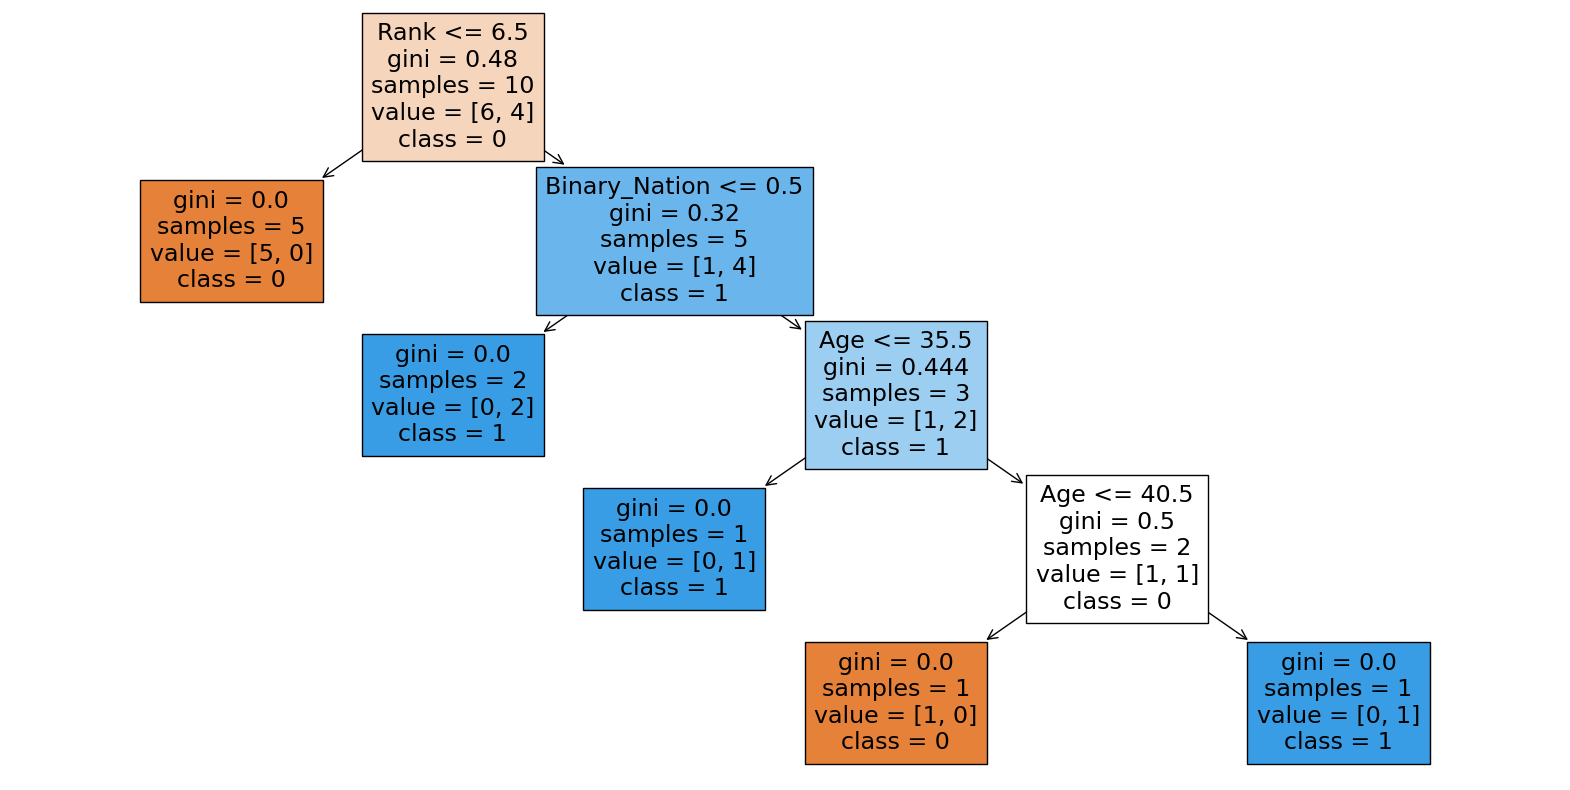

In [50]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Assuming you've already split your data into x_train and y_train
tree = DecisionTreeClassifier()
train = tree.fit(x_train, y_train)

# Plot the decision tree
plt.figure(figsize=(20,10))  # Adjust the figure size as needed
plot_tree(tree, 
          filled=True, 
          feature_names=x_train.columns if hasattr(x_train, 'columns') else None, 
          class_names=[str(c) for c in tree.classes_])
plt.show()

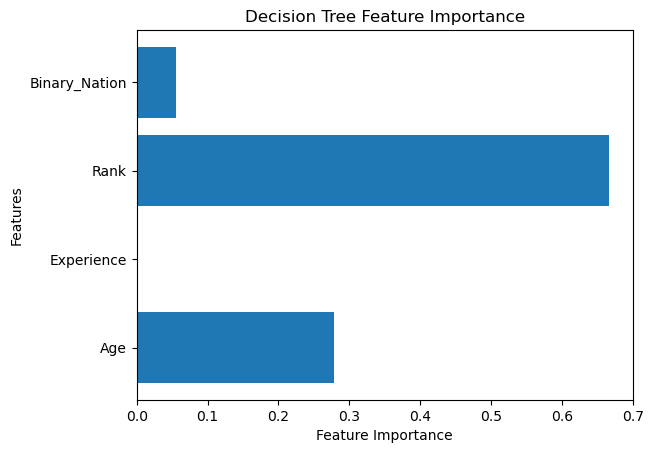

In [51]:
import pandas as pd

# Get feature importances
importance = tree.feature_importances_
features = x_train.columns if hasattr(x_train, 'columns') else range(len(importance))

# Plot feature importance
plt.barh(features, importance)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Decision Tree Feature Importance')
plt.show()

In [52]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_train,train.predict(x_train))*100
accuracy


100.0

In [53]:
train=tree.fit(x_test,y_test)

In [54]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,train.predict(x_test))*100
accuracy


100.0